In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import datasets
from math import sqrt

import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("ticks")
%matplotlib inline

# Data Acquisition


In [2]:
data_x = pd.read_csv('demo_caries_x.csv', index_col=False)
data_y = pd.read_csv('demo_caries_y.csv', index_col=False)
data = pd.concat([data_x, data_y], axis = 1)
df_caries = data.drop(columns="ID")
df_caries.head()

,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,...,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,OUTPUT
0,1.103065,-0.117923,-0.224917,-1.022062,1.255341,0.370975,-0.455735,-0.258301,0.733099,-0.370353,...,-0.270316,-2.660909,-0.095293,-0.101203,-0.962825,-0.703204,-0.272598,-0.252338,-0.258429,1
1,1.817111,-0.117923,-0.224917,0.978139,1.301970,-4.635980,-0.455735,-0.258301,0.710193,0.854105,...,-0.270316,-0.661851,1.368985,1.286272,-0.962825,-0.464729,-0.056912,-0.029714,1.506775,1
2,1.539426,-0.117923,-0.224917,0.978139,-0.275011,0.370975,-0.455735,-0.258301,-0.093382,-1.594812,...,-0.123348,-0.001640,0.355376,0.336546,1.038318,0.250693,-0.560180,-0.549171,-0.633454,0
3,-0.007673,-0.117923,-0.224917,0.978139,-0.220630,0.370975,-0.455735,-0.258301,-0.051323,2.078564,...,0.317557,0.097166,2.779416,2.741962,1.038318,0.489168,0.302565,0.341327,1.823606,0
4,1.975787,-0.117923,-0.224917,-1.022062,1.568519,0.370975,-0.455735,-0.258301,1.055281,2.078564,...,-0.270316,1.337206,0.922431,0.819710,-0.962825,1.204591,0.230670,0.267119,1.823606,1


In [3]:
df_caries.tail()

,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC3,DMDEDUC2,...,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,OUTPUT
3547,-0.920064,-1.669271,-1.428991,-1.022062,-1.131274,0.096357,-0.455735,-0.258301,-0.128883,0.028664,...,0.464526,0.104000,-0.124253,-0.115462,-0.962825,-1.180152,-0.200703,-0.178130,0.090732,0
3548,0.389019,0.657751,0.377121,-1.022062,-0.274666,0.370975,-0.455735,-0.258301,-0.134488,0.854105,...,0.317557,0.116472,-0.216017,-0.175408,-0.962825,0.250693,-0.200703,-0.178130,0.465757,0
3549,1.380749,-1.669271,-1.428991,0.978139,1.273062,0.370975,-0.455735,-0.258301,0.779782,-1.594812,...,-0.270316,-0.661851,-0.642938,-0.664809,-0.962825,-0.464729,-0.056912,-0.029714,0.873112,1
3550,0.547696,-1.669271,-1.428991,-1.022062,-0.413676,0.370975,2.193642,2.488659,-0.299916,-2.819271,...,0.023621,0.087866,0.847328,0.946374,1.038318,0.966116,-0.128807,-0.103922,1.054158,0
3551,-0.959733,-1.669271,-1.428991,0.978139,-1.451112,0.127016,-0.455735,-0.258301,-0.149123,0.061554,...,-0.270316,-0.661851,-0.462428,-0.438712,-0.962825,-0.941678,-0.200703,-0.178130,-0.148508,0


## Data Visualization

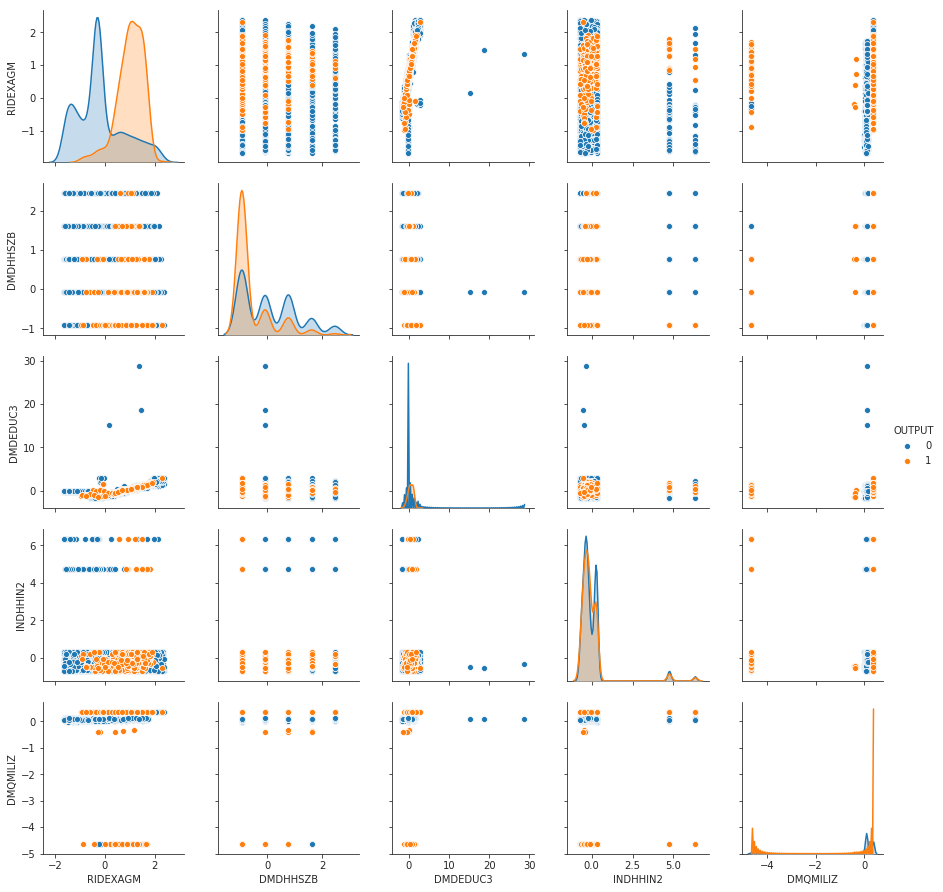

In [4]:
sns.pairplot(df_caries, hue='OUTPUT', vars=['RIDEXAGM', 'DMDHHSZB',  'DMDEDUC3', 'INDHHIN2', 'DMQMILIZ'])

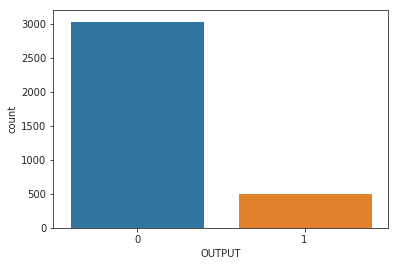

In [5]:
sns.countplot(df_caries['OUTPUT'])

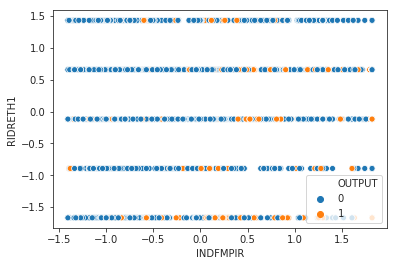

In [6]:
sns.scatterplot(x='INDFMPIR', y = 'RIDRETH1', hue='OUTPUT', data=df_caries)

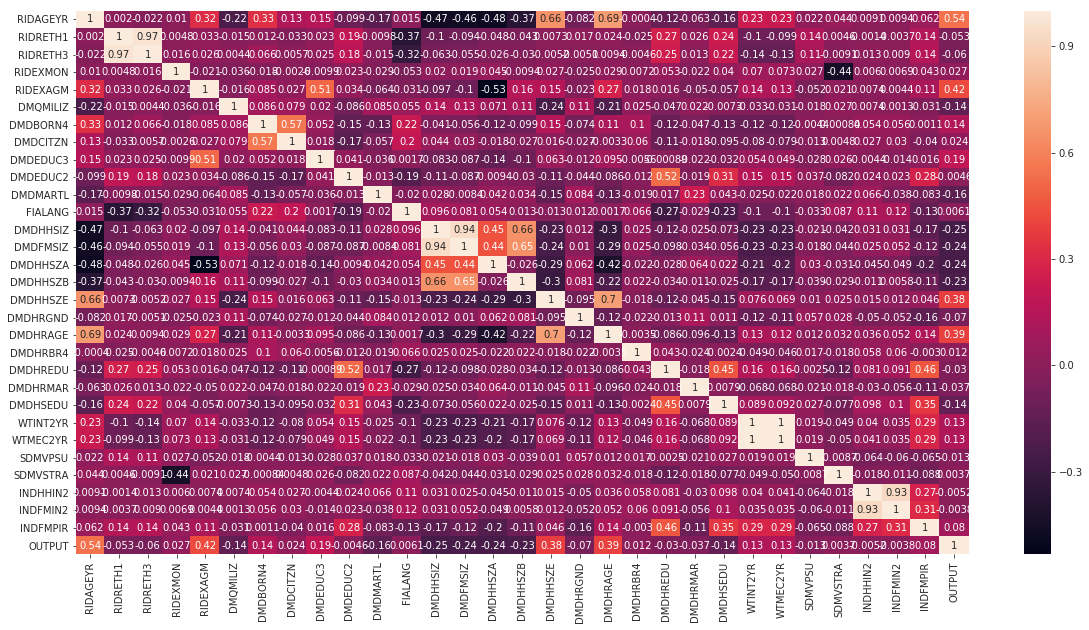

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df_caries.corr(), annot=True)

# Data Preprocessing

In [8]:
df_caries.shape

(3552, 31)

# Feature Extraction

In [9]:
#Correlation with output variable
cor_target = abs(df_caries["OUTPUT"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.head()

0     1
1     1
4     1
32    1
35    1
Name: OUTPUT, dtype: int64

# Classification Analysis

In [10]:
x_value = df_caries.drop(columns="OUTPUT")
x_value = df_caries[['RIDEXAGM', 'DMDHHSZB',  'DMDEDUC3', 'INDHHIN2', 'DMQMILIZ']]
x_value.head()

,RIDEXAGM,DMDHHSZB,DMDEDUC3,INDHHIN2,DMQMILIZ
0,1.255341,0.762566,0.733099,-0.272598,0.370975
1,1.301970,-0.924006,0.710193,-0.056912,-4.635980
2,-0.275011,-0.924006,-0.093382,-0.560180,0.370975
3,-0.220630,-0.924006,-0.051323,0.302565,0.370975
4,1.568519,-0.924006,1.055281,0.230670,0.370975


In [11]:
y_value = df_caries['OUTPUT']
y_value.head()

0    1
1    1
2    0
3    0
4    1
Name: OUTPUT, dtype: int64

In [12]:
# Data Split
from sklearn.model_selection import train_test_split
seed = 1234
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=0.3, random_state=seed)

In [13]:
x_train.head()

,RIDEXAGM,DMDHHSZB,DMDEDUC3,INDHHIN2,DMQMILIZ
2109,1.516280,-0.080720,1.022943,0.302565,0.095800
159,1.053807,-0.080720,0.492055,-0.272598,0.370975
1439,-0.971354,-0.924006,-0.133902,-0.560180,0.078289
2166,-0.327786,-0.924006,-0.164640,-0.272598,0.370975
453,-0.284975,-0.924006,-0.172231,0.230670,0.370975


## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

lr_model = LogisticRegression(random_state=seed, solver='lbfgs', multi_class='ovr')
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=1234, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_pred = lr_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

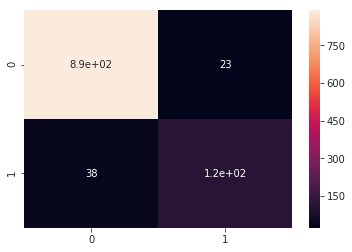

In [16]:
cm = confusion_matrix(y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True)

In [17]:
accuracy_score(y_test, y_pred)

0.94277673545966234

In [18]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       913
           1       0.83      0.75      0.79       153

   micro avg       0.94      0.94      0.94      1066
   macro avg       0.90      0.86      0.88      1066
weighted avg       0.94      0.94      0.94      1066



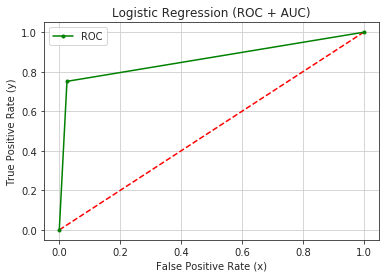

0.863221155567


In [19]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.plot(fpr, tpr, marker='.', label = 'ROC', color= 'green')
plt.title('Logistic Regression (ROC + AUC)')
plt.xlabel('False Positive Rate (x)')
plt.ylabel('True Positive Rate (y)')
plt.grid()
plt.legend()
plt.show()
print(auc)

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=seed)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [22]:
y_pred_ = rf_model.predict(x_test)
y_pred_

array([1, 0, 0, ..., 0, 1, 0])

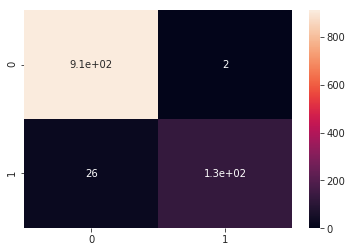

In [23]:
cm = confusion_matrix(y_test, y_pred=y_pred_)
sns.heatmap(cm, annot=True)

In [24]:
accuracy_score(y_test, y_pred_)

0.97373358348968109

In [25]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred_, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       913
           1       0.98      0.83      0.90       153

   micro avg       0.97      0.97      0.97      1066
   macro avg       0.98      0.91      0.94      1066
weighted avg       0.97      0.97      0.97      1066



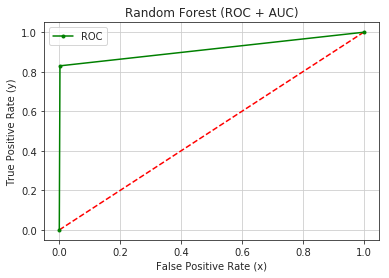

0.913937389487


In [26]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)
auc_rf = roc_auc_score(y_test, y_pred_)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.plot(fpr, tpr, marker='.', label = 'ROC', color= 'green')
plt.title('Random Forest (ROC + AUC)')
plt.xlabel('False Positive Rate (x)')
plt.ylabel('True Positive Rate (y)')
plt.grid()
plt.legend()
plt.show()
print(auc_rf)

## Support Vector Machine

In [27]:
from sklearn.svm import SVC

In [28]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

/home/ospcx/anaconda3/envs/pyml/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred__ = svc_model.predict(x_test)
y_pred__

array([1, 0, 0, ..., 0, 1, 0])

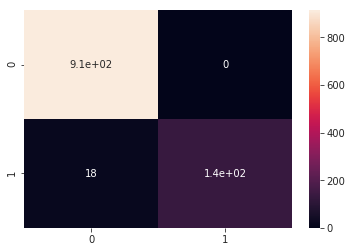

In [30]:
cm = confusion_matrix(y_test, y_pred=y_pred__)
sns.heatmap(cm, annot=True)

In [31]:
accuracy_score(y_test, y_pred__)

0.98311444652908064

In [32]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred__, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       1.00      0.88      0.94       153

   micro avg       0.98      0.98      0.98      1066
   macro avg       0.99      0.94      0.96      1066
weighted avg       0.98      0.98      0.98      1066



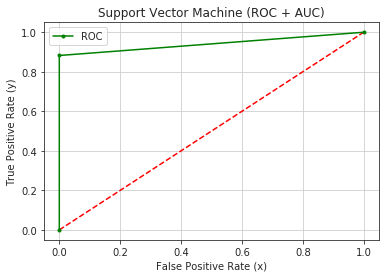

0.941176470588


In [33]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred__)
auc_rf = roc_auc_score(y_test, y_pred__)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.plot(fpr, tpr, marker='.', label = 'ROC', color= 'green')
plt.title('Support Vector Machine (ROC + AUC)')
plt.xlabel('False Positive Rate (x)')
plt.ylabel('True Positive Rate (y)')
plt.grid()
plt.legend()
plt.show()
print(auc_rf)

## Neural Net

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                          solver='sgd', verbose=0,  random_state=seed,tol=0.000000001)
%time mlp_model.fit(x_train, y_train)

CPU times: user 1min 8s, sys: 332 ms, total: 1min 8s
Wall time: 36.3 s


/home/ospcx/anaconda3/envs/pyml/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='sgd', tol=1e-09,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
y_pred_mlp = mlp_model.predict(x_test)

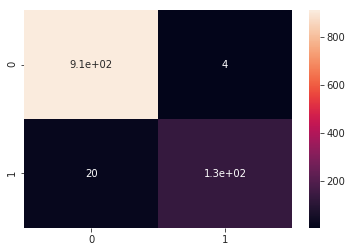

In [37]:
cm = confusion_matrix(y_test, y_pred=y_pred_mlp)
sns.heatmap(cm, annot=True)

In [38]:
print(accuracy_score(y_test, y_pred_mlp))
print(accuracy_score(y_test, y_pred_mlp))

0.97748592870544093

In [39]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred_mlp, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       0.97      0.87      0.92       153

   micro avg       0.98      0.98      0.98      1066
   macro avg       0.97      0.93      0.95      1066
weighted avg       0.98      0.98      0.98      1066



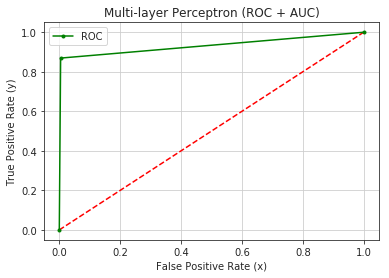

0.932449942372


In [40]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.plot(fpr, tpr, marker='.', label = 'ROC', color= 'green')
plt.title('Multi-layer Perceptron (ROC + AUC)')
plt.xlabel('False Positive Rate (x)')
plt.ylabel('True Positive Rate (y)')
plt.grid()
plt.legend()
plt.show()
print(auc_mlp)

# Validation

In [42]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(x_train) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

## Bias and Variance